In [1]:
import numpy as np
import pandas as pd
import cv2
import json
import os
import requests
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw,ImageEnhance


In [2]:
#step 8 for 1 to 7 steps
with open ('cat_dog_annotations.json') as file:
    val=file.read()
    
json=json.loads(val)


In [3]:
data=json["_via_img_metadata"].values()

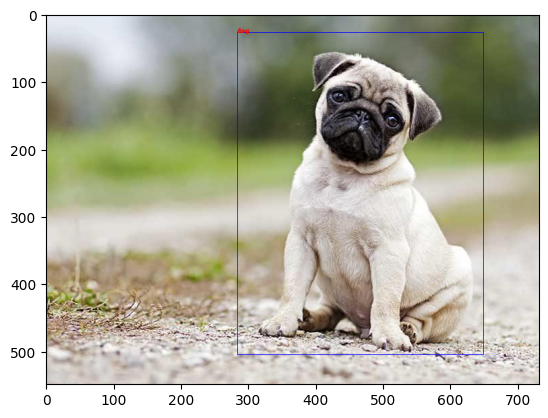

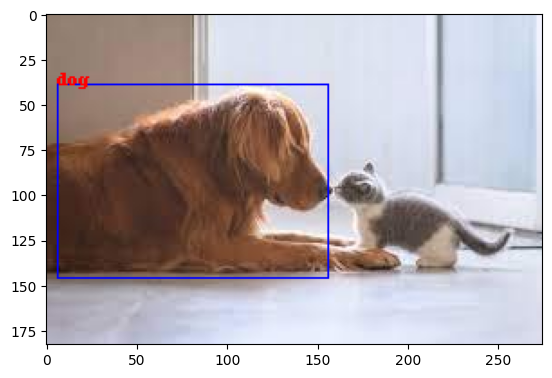

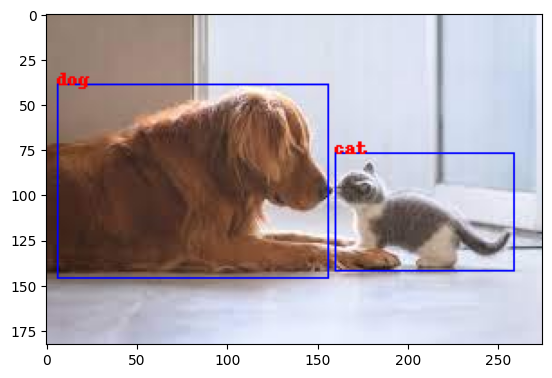

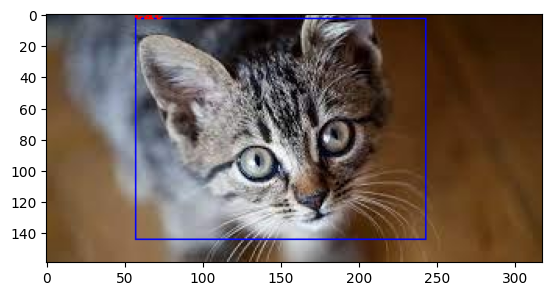

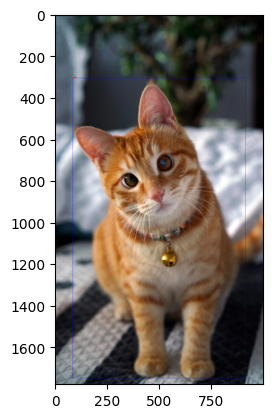

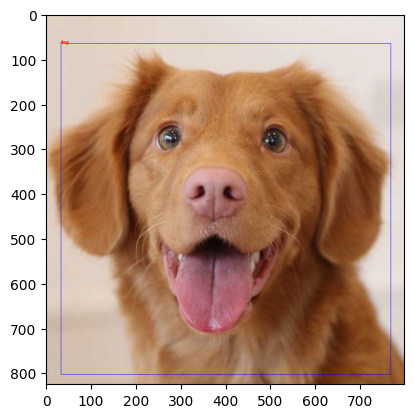

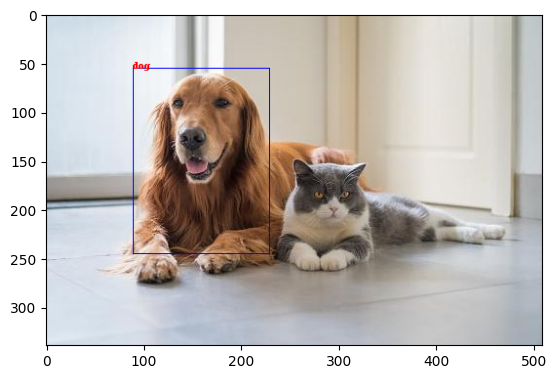

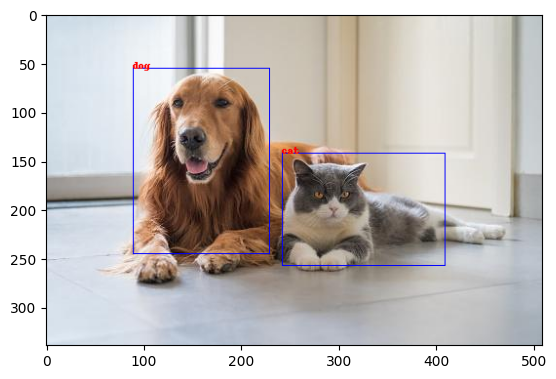

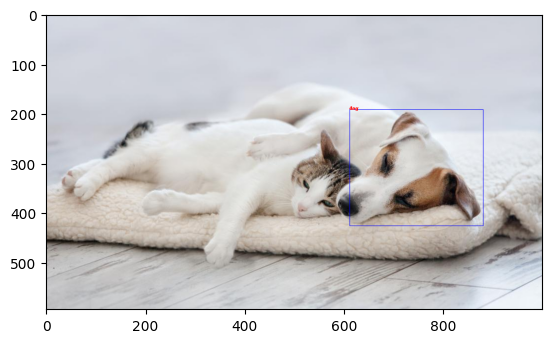

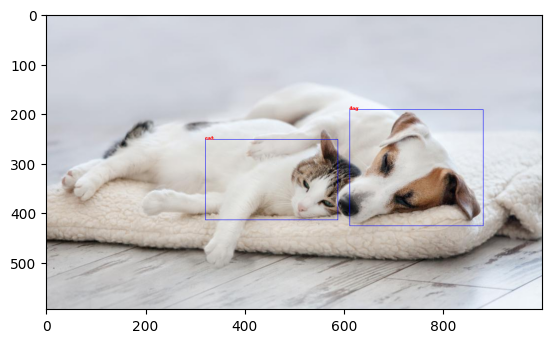

In [4]:
#fetch all images

for image in data:
    fn = image['filename']
    img = Image.open(fn)
    draw=ImageDraw.Draw(img)



    for region in image['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        w = region['shape_attributes']['width']
        h = region['shape_attributes']['height']
        label = list(region["region_attributes"]["class"].keys())[0]

        draw.rectangle((x, y, x + w, y + h), outline='blue')
        draw.text((x, y - 8), label, fill='red')

        

        plt.imshow(img)
        

        plt.show()


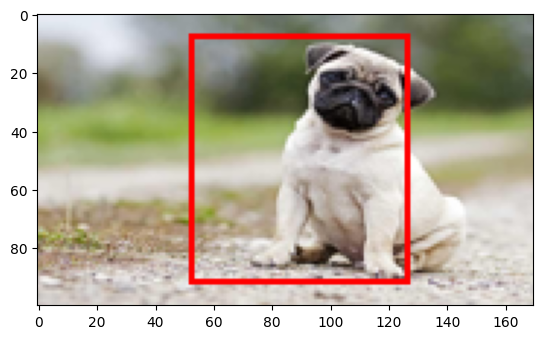

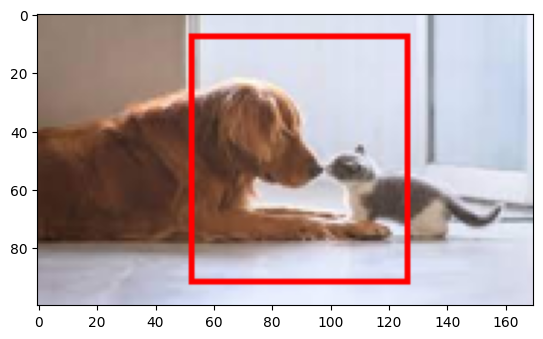

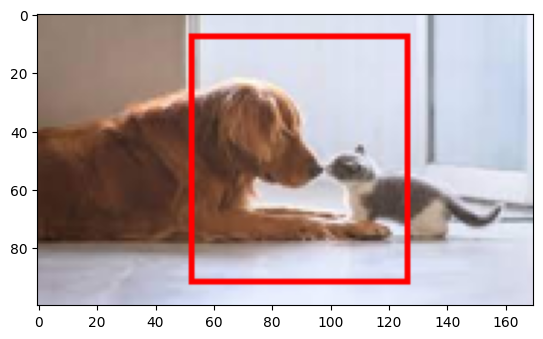

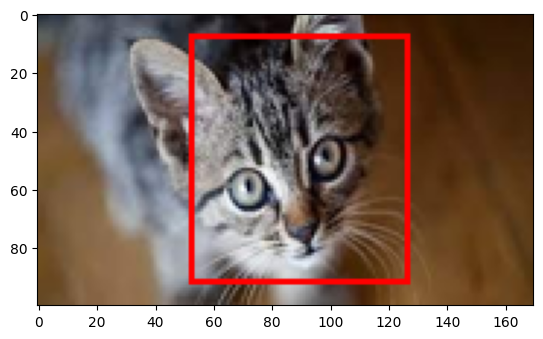

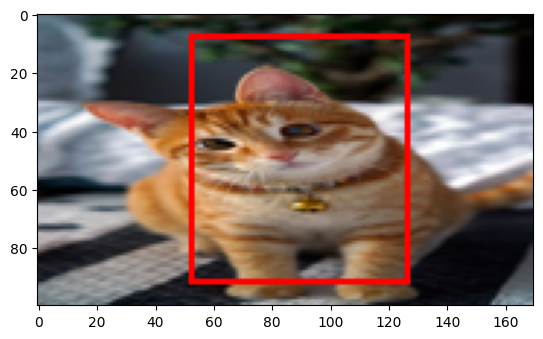

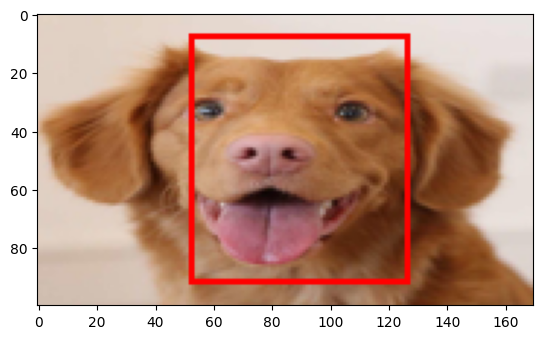

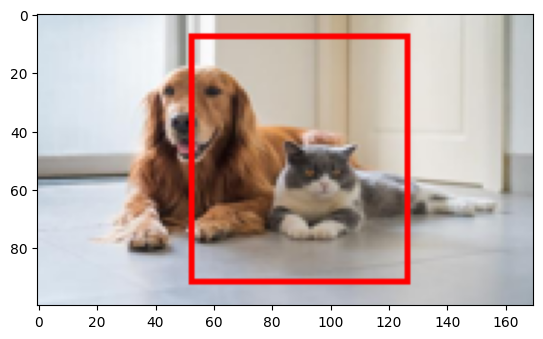

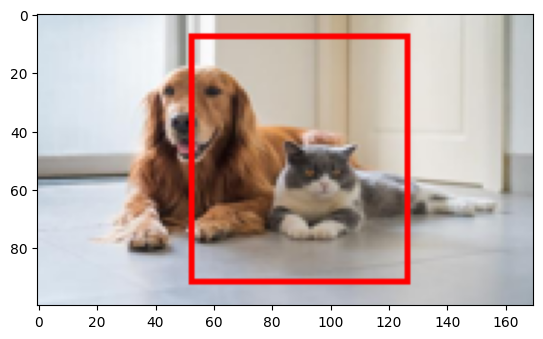

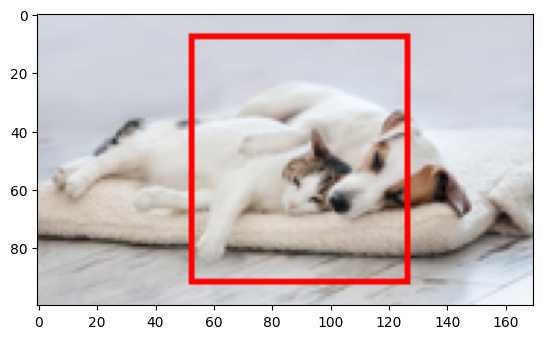

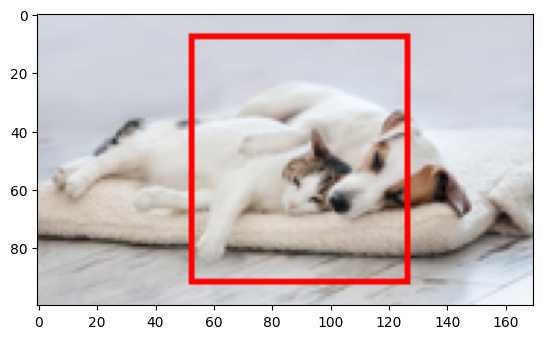

In [5]:

#resize each image along its bounding box accoeding image w,h
for image in data:
    fn = image['filename']
    img = Image.open(fn)



    for region in image['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        w = region['shape_attributes']['width']
        h = region['shape_attributes']['height']
        label = list(region["region_attributes"]["class"].keys())[0]

        draw.rectangle((x, y, x + w, y + h), outline='blue')
        draw.text((x, y - 8), label, fill='red')
        new_img = img.resize((170, 100))
        draw = ImageDraw.Draw(new_img)
        box_size = 85
        center_x = new_img.size[0] / 2
        center_y = new_img.size[1] / 2
        box_coords = (center_x+10 - box_size /2, center_y - box_size / 2,
        center_x + box_size / 2, center_y + box_size / 2)
        draw.rectangle(box_coords, outline="red", width=2)
        

        plt.imshow(new_img)
        

        plt.show()


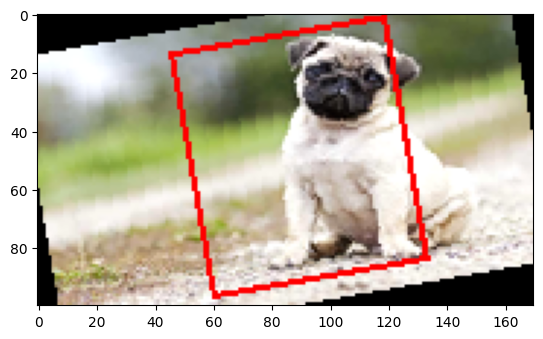

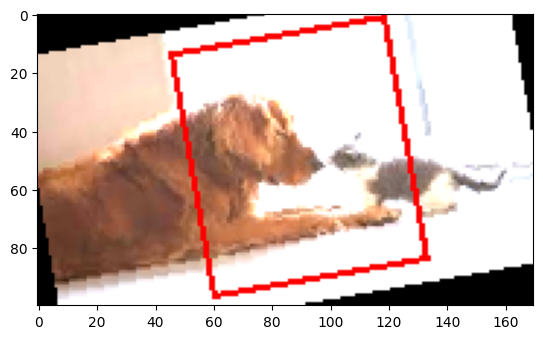

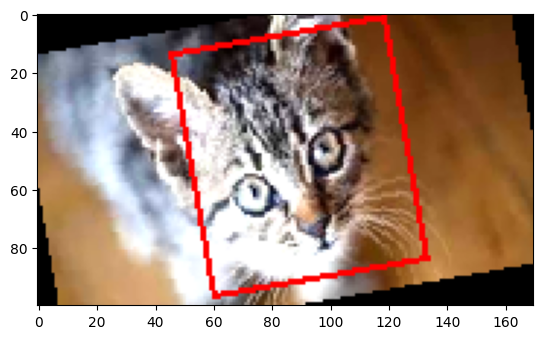

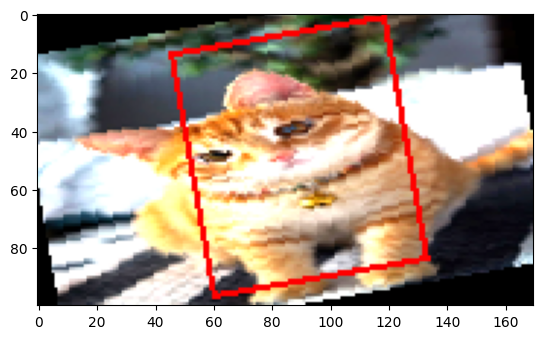

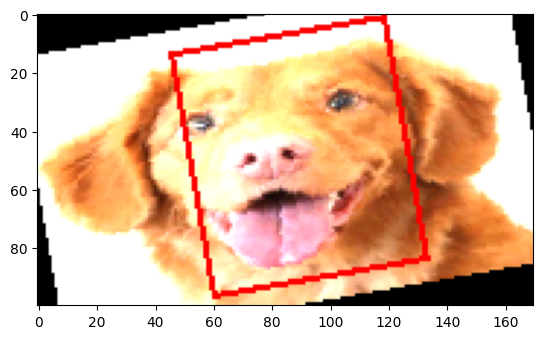

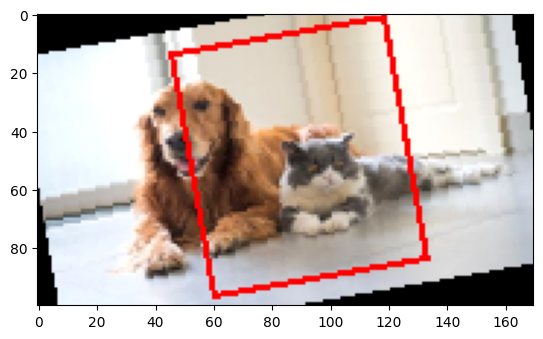

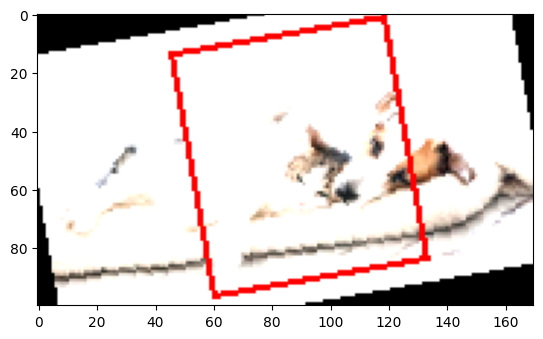

In [15]:
#add bightness on each resized image and rotate them at n angle

for image in data:
    fn = image['filename']
    img = Image.open(fn)



    for region in image['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        w = region['shape_attributes']['width']
        h = region['shape_attributes']['height']
        label = list(region["region_attributes"]["class"].keys())[0]

        draw.rectangle((x, y, x + w, y + h), outline='blue')
        draw.text((x, y - 8), label, fill='red')
        new_img = img.resize((170, 100))
        draw = ImageDraw.Draw(new_img)
        box_size = 85
        center_x = new_img.size[0] / 2
        center_y = new_img.size[1] / 2
        box_coords = (center_x+10 - box_size /2, center_y - box_size / 2,
        center_x + box_size / 2, center_y + box_size / 2)
        draw.rectangle(box_coords, outline="red", width=2)
        brightness = random.uniform(1, 2)
        enhancer = ImageEnhance.Brightness(new_img)
        img_mod = enhancer.enhance(brightness)
        #using PIL library 
        rotate_img= img_mod.rotate(10) 

    plt.imshow(rotate_img)
    plt.show()
      

In [21]:
output_dir='images/7th_rotated_img/'
for i, image in enumerate(data):
    fn = image['filename']
    img = Image.open(fn)

    for region in image['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        w = region['shape_attributes']['width']
        h = region['shape_attributes']['height']
        label = list(region["region_attributes"]["class"].keys())[0]

        new_img = img.resize((170, 100))
        draw = ImageDraw.Draw(new_img)
        draw.rectangle((x, y, x + w, y + h), outline='blue')
        draw.text((x, y - 8), label, fill='red')
        box_size = 85
        center_x = new_img.size[0] / 2
        center_y = new_img.size[1] / 2
        box_coords = (center_x+10 - box_size /2, center_y - box_size / 2,
                      center_x + box_size / 2, center_y + box_size / 2)
        draw.rectangle(box_coords, outline="red", width=2)
        brightness = random.uniform(1, 2)
        enhancer = ImageEnhance.Brightness(new_img)
        img_mod = enhancer.enhance(brightness)

        for angle in range(0, 355, 5):
            rotate_img = img_mod.rotate(angle)
            file_name = f"rotate_img_{i}_{angle}.jpeg"
            rotate_img.save(os.path.join(output_dir, file_name))
#             plt.imshow(rotate_img)
#             plt.show()
